# Linear and Logistic Regression

## Importing the libraries

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [7]:
data = pd.read_csv("HRV.csv")

In [9]:
data.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [12]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Count'>

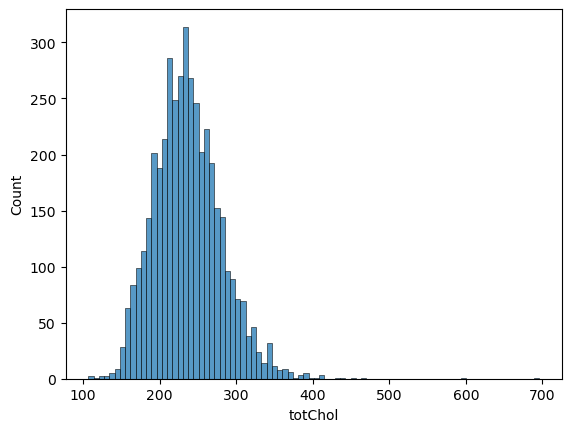

In [63]:
sns.histplot(data['totChol'])

In [18]:
col_median= data['totChol'].median()

col_median

data['totChol'].fillna(col_median, inplace = True)

In [22]:
BMI_mean= data['BMI'].mean()

BMI_mean

data['BMI'].fillna(BMI_mean, inplace = True)

In [24]:
heartRate_mean = data['heartRate'].mean()

heartRate_mean

data['heartRate'].fillna(heartRate_mean, inplace = True)

In [26]:
glucose_mean = data['glucose'].mean()

glucose_mean

data['glucose'].fillna(glucose_mean, inplace = True)

In [97]:
data.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.691072,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.345006,22.046338,11.911857,4.072013,12.029944,22.844392,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.072500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,262.000000,144.000000,89.500000,28.027500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [27]:
data.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

In [30]:
data.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Create independent and dependent variables to predict 

In [49]:
x = data[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']]
y = data['totChol']

## Splitting the dataset into the Training set and Test set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Training the Linear Regression model 

In [51]:
regressor = LinearRegression()
# .fit() to train your model
regressor.fit(X_train.values, y_train)

LinearRegression()

## Model performance check- R Square and RMSE score

In [54]:
y_pred = regressor.predict(X_test.values)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-square: {r2_score(y_test, y_pred):.2f}")

MSE: 1705.90
RMSE: 41.30
R-square: 0.09


## Predicting new results where the actual results are given
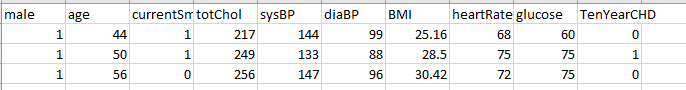

In [59]:
# case 1: actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([230.68697534])

In [60]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([239.1892207])

In [61]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([244.95130529])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [65]:
x = data[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD','totChol']]
y = data['TenYearCHD']

## Splitting the dataset into the Training set and Test set

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=0)

## Training the Logistic Regression model 

In [82]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
#.fit to train your model
classifier.fit(x_train.values,y_train)

LogisticRegression()

In [83]:
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [85]:
y_test

3554    0
410     0
3868    1
1487    0
840     1
       ..
3829    1
2527    0
349     0
2100    0
2842    1
Name: TenYearCHD, Length: 1398, dtype: int64

In [86]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [87]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1182    0]
 [   0  216]]


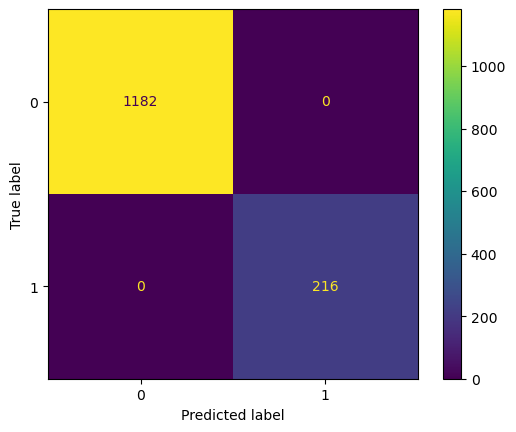

In [75]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

Report:

. TN (True Negative) = No CHD predicted correctly (216)

. TP = CHD predicted correctly (1182)

. FP = Actually no CHD but predicted yes (0)

. FN = Actually CHD predicted no CHD (0)

## Predicting new results where the actual results are given
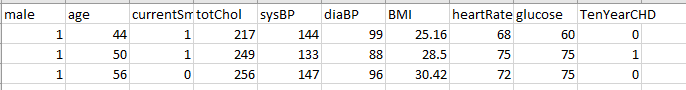

In [94]:
classifier.predict([[1,44,1,217,144,89,25.16,68,60,0]])

array([1], dtype=int64)

In [95]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75,1]])

array([1], dtype=int64)

In [93]:
classifier.predict([[1,56,0,256,147,96,30.42,71,75,0]])

array([1], dtype=int64)

### Summary

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       216

    accuracy                           1.00      1398
   macro avg       1.00      1.00      1.00      1398
weighted avg       1.00      1.00      1.00      1398



In [ ]:
# accuracy score 1.00 or a 100%

It is an balanced dataset as there is an equal amount of 0's  1's to support the prediction that is being done by the data set. I used mean for most of my preprocessing, the mean is still not much different than the median. There was a simple error in the code as I had to run it over one more time, to get the correct answers. But other than that everything was fine as the model prediction's is a 100% accurate with what the data acutally is. 